In [ ]:
!pip install tensorflow matplotlib numpy


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


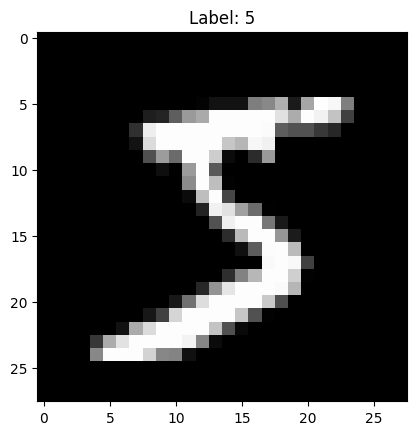

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8796 - loss: 0.4292
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9645 - loss: 0.1204
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9770 - loss: 0.0780
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9838 - loss: 0.0547
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9874 - loss: 0.0412
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9738 - loss: 0.0881
Test Accuracy: 0.98


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt

# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# Visualize a sample
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()

# Build the model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 digits (0-9)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")


In [ ]:
!pip install easyocr



In [ ]:
!pip install matplotlib Pillow

Saving hello-writing-on-paper-greetings-260nw-723335125.webp to hello-writing-on-paper-greetings-260nw-723335125.webp
Detected: 'Hellol' with 0.92 confidence
Detected: 'shutterstockcom' with 0.86 confidence
Detected: '723335125' with 0.68 confidence


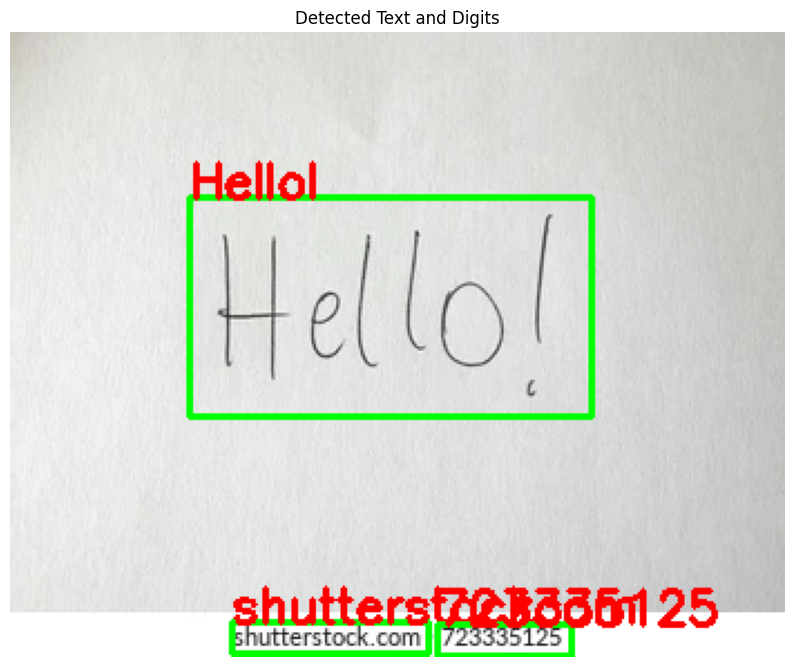

In [ ]:



from google.colab import files
uploaded = files.upload()


import easyocr
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np


image_path = list(uploaded.keys())[0]


image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

reader = easyocr.Reader(['en'])


results = reader.readtext(image)


for (bbox, text, confidence) in results:
    print(f"Detected: '{text}' with {confidence:.2f} confidence")

    (top_left, top_right, bottom_right, bottom_left) = bbox
    top_left = tuple([int(val) for val in top_left])
    bottom_right = tuple([int(val) for val in bottom_right])

    cv2.rectangle(image_rgb, top_left, bottom_right, (0, 255, 0), 2)
    cv2.putText(image_rgb, text, top_left, cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)

plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.axis('off')
plt.title("Detected Text and Digits")
plt.show()


In [ ]:


from google.colab import files
uploaded = files.upload()


from PIL import Image
image_path = list(uploaded.keys())[0]
image = Image.open(image_path).convert("RGB")



if image.width > 1024:
    ratio = 1024 / image.width
    new_size = (1024, int(image.height * ratio))
    image = image.resize(new_size)


from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import torch


processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-handwritten")

pixel_values = processor(images=image, return_tensors="pt").pixel_values
generated_ids = model.generate(pixel_values, max_new_tokens=512)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]


print("🧾 Extracted Handwritten Text:")
print("----------------------------------")
print(generated_text)


Saving Sample-handwritten-text-input-for-OCR.png to Sample-handwritten-text-input-for-OCR.png


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/224 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.17k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

🧾 Extracted Handwritten Text:
----------------------------------
Techniques and production .


In [ ]:
# 🧰 Step 1: Install Required Libraries
!pip install transformers
!pip install torch torchvision torchaudio
!pip install sentencepiece
!pip install Pillow